# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [259]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data = pd.merge(study_results,mouse_metadata)

# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [260]:
# Checking the number of mice.
full_data["Mouse ID"].nunique()

249

In [261]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
full_data[full_data.duplicated(keep=False)].iloc[0,0]

'g989'

In [262]:
# Optional: Get all the data for the duplicate mouse ID. 
full_data.loc[full_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [263]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_data[~full_data["Mouse ID"].isin(["g989"])]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [264]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [265]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumors = clean_data[["Tumor Volume (mm3)","Drug Regimen"]]
drugs = tumors.groupby(["Drug Regimen"])
mean = drugs["Tumor Volume (mm3)"].mean()
median = drugs["Tumor Volume (mm3)"].median()
variance = drugs["Tumor Volume (mm3)"].var()
std_dev = drugs["Tumor Volume (mm3)"].std()
sem = drugs["Tumor Volume (mm3)"].sem()

stats = {"Mean Tumor Volume" : mean,"Median Tumor Volume" : median, "Tumor Volume Variance" : variance, "Tumor Volume Std. Dev." : std_dev,"Tumor Volume Std. Err" : sem}
stats_df = pd.DataFrame(stats)
stats_df.index.name = "Drug Regimen"
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

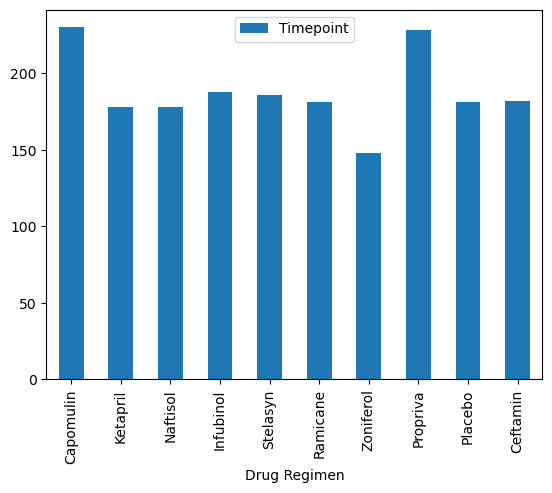

In [266]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dgs = clean_data.groupby(["Drug Regimen"])
tp = dgs["Timepoint"].count()
drug_list = clean_data["Drug Regimen"].unique()
drug_time = {"Drug Regimen" : drug_list, "Timepoint" : tp}
drug_time_df = pd.DataFrame(drug_time)
drug_time_df.plot.bar(x="Drug Regimen", y="Timepoint", rot=90)

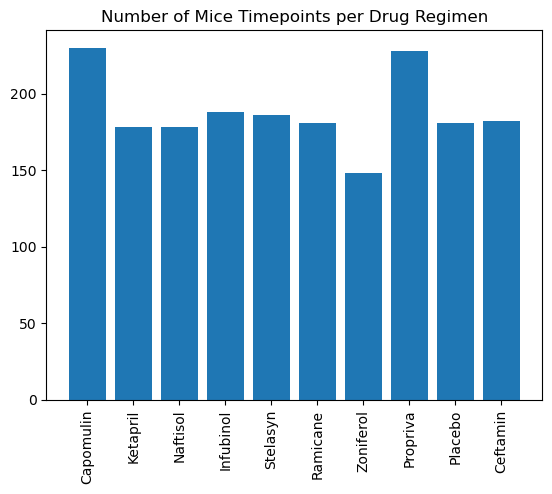

In [267]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_list,tp)
plt.xticks(rotation=90)
plt.title("Number of Mice Timepoints per Drug Regimen")
plt.show()

<Axes: title={'center': 'Proportion of Mice for Each Gender In This Study'}, ylabel='Mouse ID'>

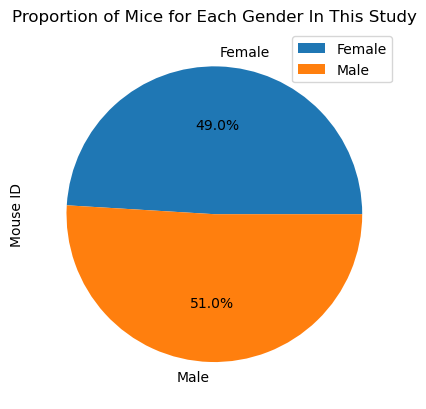

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data.groupby(["Sex"])
gcounts = gender.count()
gcount = gcounts["Mouse ID"]
gcount_df = pd.DataFrame(gcount)
gcount_df.plot.pie(y="Mouse ID",autopct="%1.1f%%",title=("Proportion of Mice for Each Gender In This Study"))

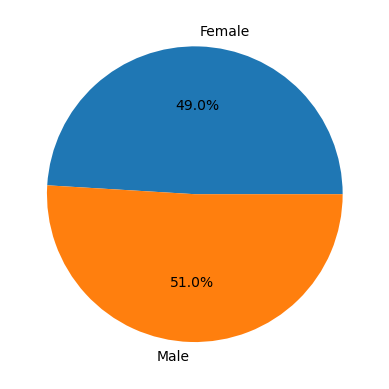

In [269]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gcount_df["Mouse ID"], labels = ["Female","Male"],autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [270]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Dataframes will be made for the above regimens
cm_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
rm_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane"]
if_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol"]
cf_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin"]

# Combine these 4 dataframes
four = [cm_df,rm_df,if_df,cf_df]
fourdf = pd.concat(four)
fourdf
# Start by getting the last (greatest) timepoint for each mouse
id = clean_data.groupby(["Mouse ID"])
high_time = id["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merger = pd.merge(fourdf,high_time,on="Mouse ID")
merger["Final Timepoint"] = merger["Timepoint_x"] == merger["Timepoint_y"]
# Dropping every row that isn't the highest timepoint row
merger.drop(merger.loc[merger["Final Timepoint"]==False].index, inplace=True)
# Making a new dataframe that contains the pertinent information for analysing the tumor volume 
tumor_time = merger[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
tumor_time.rename(columns = {"Timepoint_x":"Final Timepoint"})

,Mouse ID,Drug Regimen,Final Timepoint,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
17,j246,Capomulin,35,38.753265
27,r554,Capomulin,45,32.377357
37,s185,Capomulin,45,23.343598
47,b742,Capomulin,45,38.939633
...,...,...,...,...
787,p438,Ceftamin,45,61.433892
793,b487,Ceftamin,25,56.057749
803,o287,Ceftamin,45,59.741901
812,q483,Ceftamin,40,64.192341


In [271]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = tumor_time.loc[tumor_time["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume)
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quarts = volume.quantile([0.25,0.5,0.75])
    low = quarts[0.25]
    high = quarts[0.75]
    iqr = high-low
   
    # Determine outliers using upper and lower bounds
    low_ball = low - (1.5*iqr)
    high_ball = high + (1.5*iqr)
    outliers = volume.loc[(volume>high_ball) | (volume<low_ball)]
    if len(outliers) > 0:
        print(f"{drug}'s outliers are {outliers}.")

Infubinol's outliers are 459    36.321346
Name: Tumor Volume (mm3), dtype: float64.


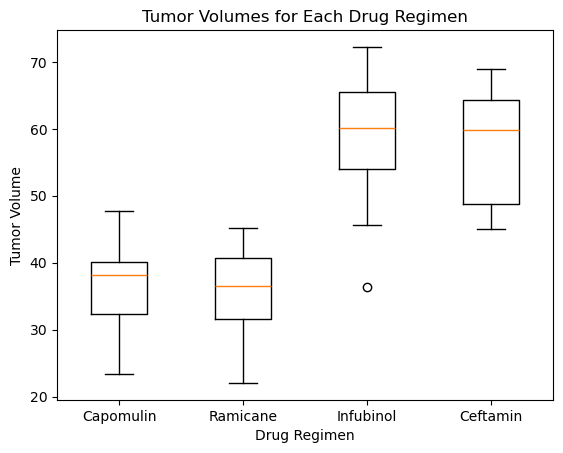

In [272]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for Each Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

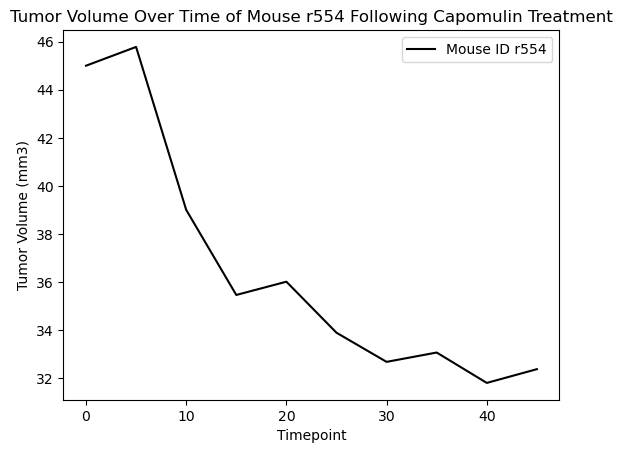

In [273]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mr554 = cm_df.loc[cm_df["Mouse ID"]=="r554"]
x=Mr554["Timepoint"]
y=Mr554["Tumor Volume (mm3)"]
plt.plot(x,y,color="black",label="Mouse ID r554")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time of Mouse r554 Following Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

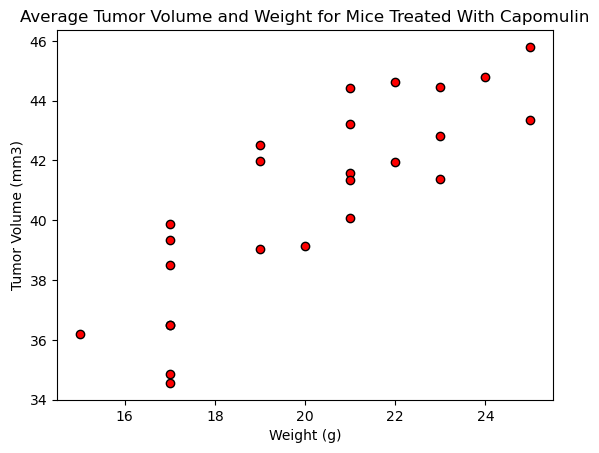

In [274]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Capomulin mouse data generation
cm_data = cm_df.groupby(["Mouse ID"])
# Generating the variables
mouse_mass = cm_data["Weight (g)"].mean()
mouse_vol = cm_data["Tumor Volume (mm3)"].mean()
# Making a new dataframe for this data
cmmv_df = pd.DataFrame({"Weight (g)" : mouse_mass,"Tumor Volume (mm3)" : mouse_vol})
# Setting the x and y values
x_v = cmmv_df["Weight (g)"]
y_v = cmmv_df["Tumor Volume (mm3)"]
# Creating the scatter plot
plt.scatter(x_v,y_v,marker="o",facecolors="red",edgecolors="black")
plt.title("Average Tumor Volume and Weight for Mice Treated With Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


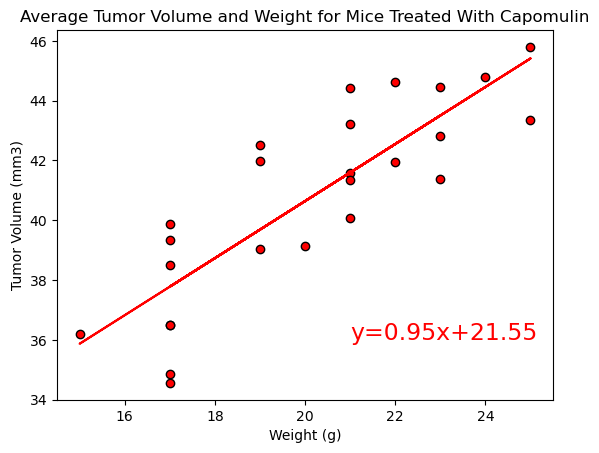

In [284]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Copying the Capomulin graph
mouse_mass = cm_data["Weight (g)"].mean()
mouse_vol = cm_data["Tumor Volume (mm3)"].mean()
cmmv_df = pd.DataFrame({"Weight (g)" : mouse_mass,"Tumor Volume (mm3)" : mouse_vol})
x_v = cmmv_df["Weight (g)"]
y_v = cmmv_df["Tumor Volume (mm3)"]
plt.scatter(x_v,y_v,marker="o",facecolors="red",edgecolors="black")
plt.title("Average Tumor Volume and Weight for Mice Treated With Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Calculating regression line and values, integrating it into the graph
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_v,y_v)
reg_v = x_v * slope + intercept
leq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(x_v,reg_v,"r-")
plt.annotate(leq,(21,36),fontsize=17,color="red")
# The correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_v,y_v)[0],2)}")